# Import Libraries

In [2]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV #split
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve #classification

from imblearn.over_sampling import SMOTE #SMOTE

# Import Data

In [3]:
#import dataset

df = pd.read_csv('bank.csv',sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Exploration

## Descriptive Analysis

In [5]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 4521 rows.


In [6]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

## Univariate Analysis

### Categorical columns exploration

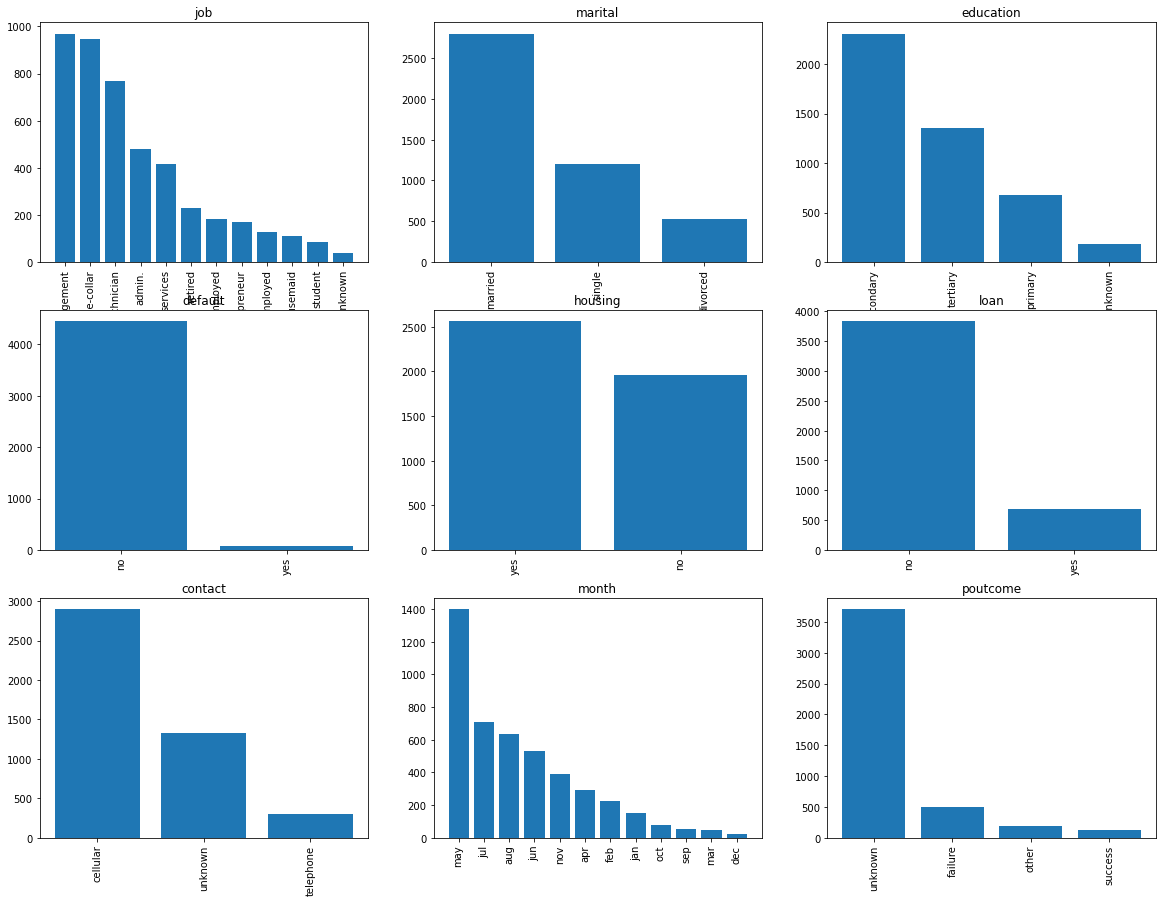

In [7]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

### Numerical columns exploration 

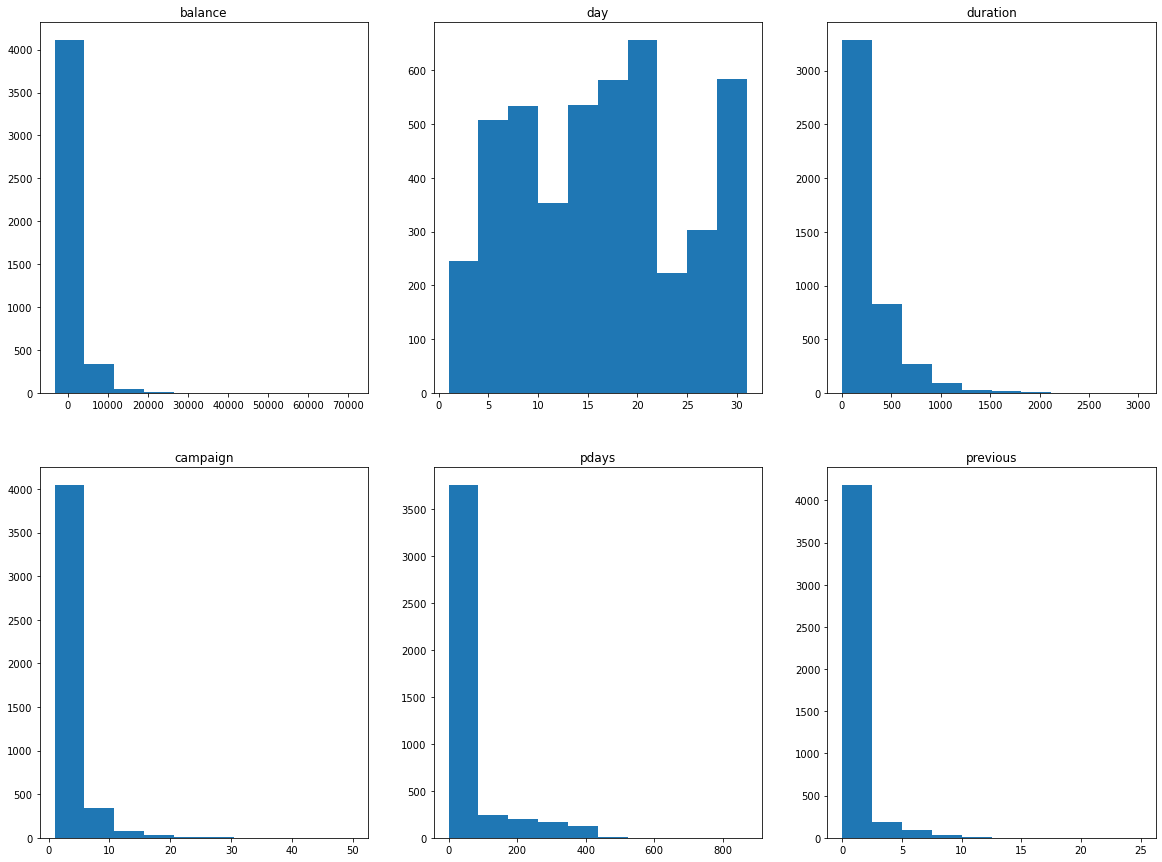

In [8]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [9]:
df[['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


    We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.
    Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:

In [10]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.57509400575094

In [11]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.04423800044238001

In [12]:
len (df[df['previous'] > 20] ) / len(df) * 100

0.08847600088476001

### Analysis of the response column

<AxesSubplot:title={'center':'deposit value counts'}>

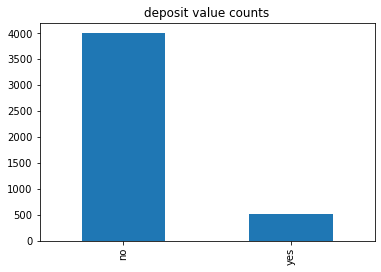

In [13]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'deposit value counts')

## Bivariate Analysis

Text(0.5, 1.0, 'Distribution of Balance by Education')

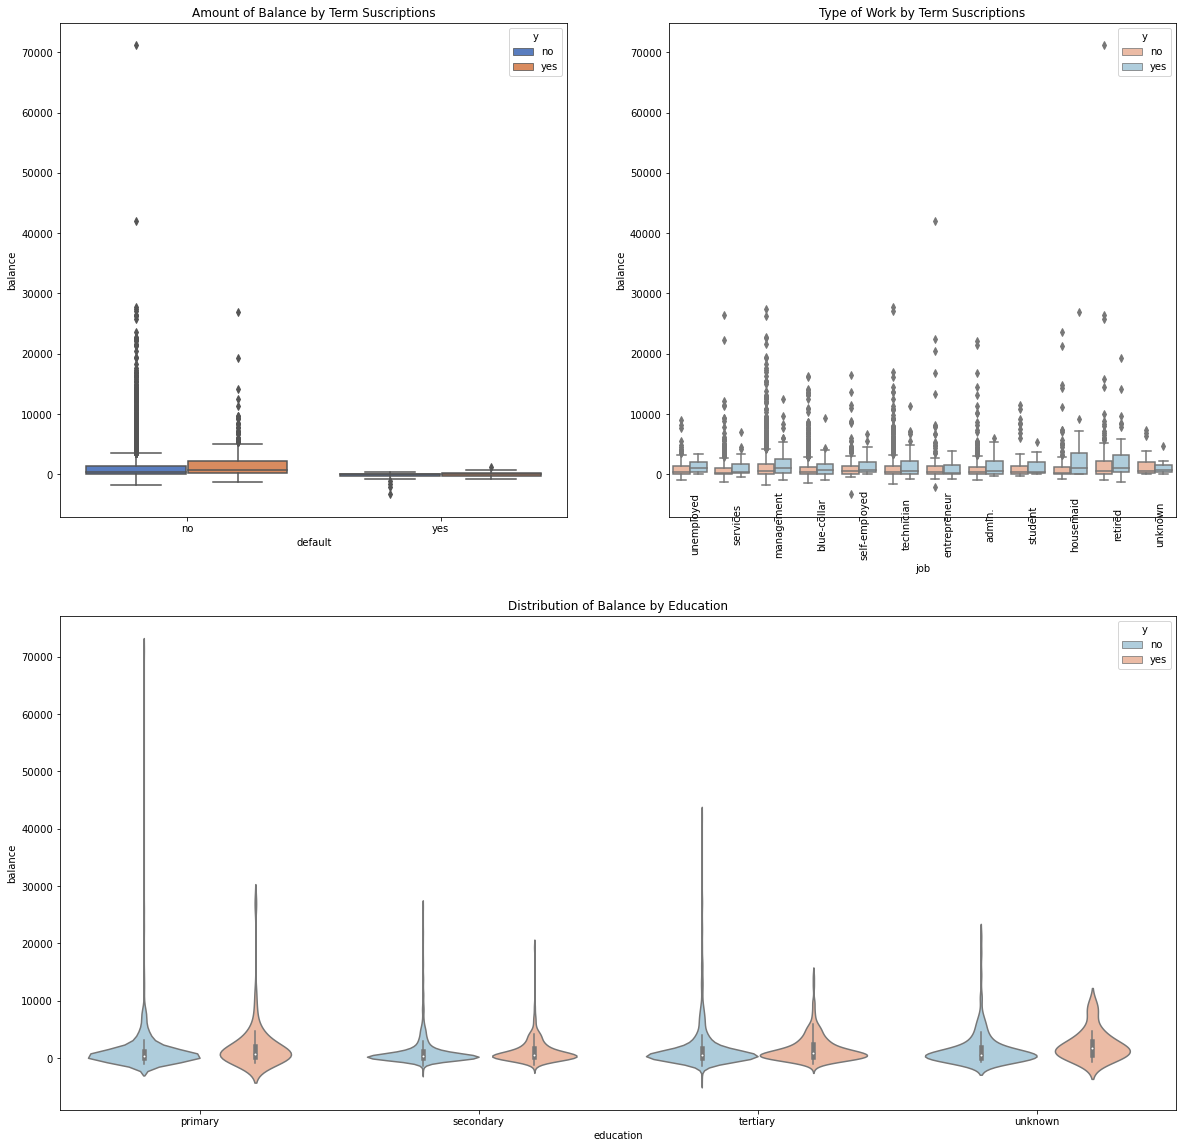

In [14]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="y",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="y",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="y", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")

<AxesSubplot:title={'center':'Job and deposit'}>

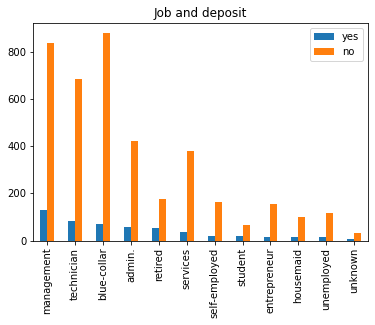

In [15]:
#job and y
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

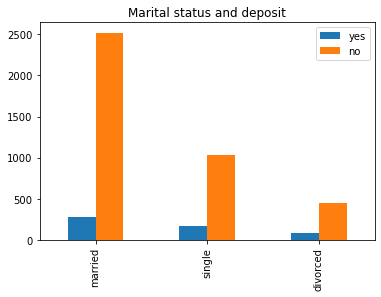

In [16]:
#marital status and y
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

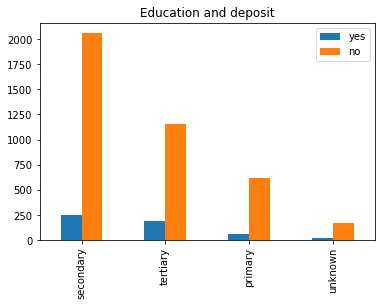

In [17]:
#education and y
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

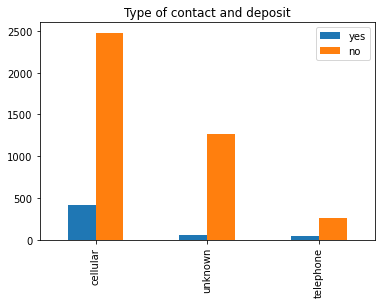

In [18]:
#type of contact and y
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [19]:
#balance and y

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (df[df['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,521.000000,4000.000000
mean,1571.955854,1403.211750
std,2444.398956,3075.349313
min,-1206.000000,-3313.000000
25%,171.000000,61.000000
50%,710.000000,419.500000
75%,2160.000000,1407.000000
max,26965.000000,71188.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

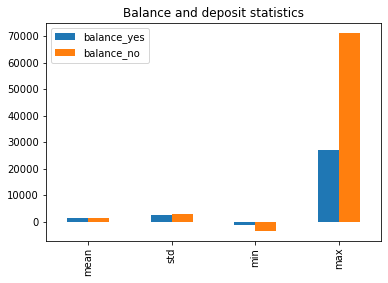

In [20]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [21]:
#age and y

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,521.000000,4000.000000
mean,42.491363,40.998000
std,13.115772,10.188398
min,19.000000,19.000000
25%,32.000000,33.000000
50%,40.000000,39.000000
75%,50.000000,48.000000
max,87.000000,86.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

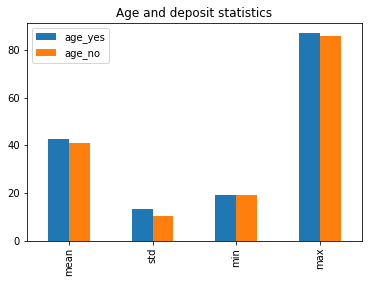

In [22]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [23]:
#number of contacts performed during this campaign ('campaign') and y
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,521.000000,4000.000000
mean,2.266795,2.862250
std,2.092071,3.212609
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,24.000000,50.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

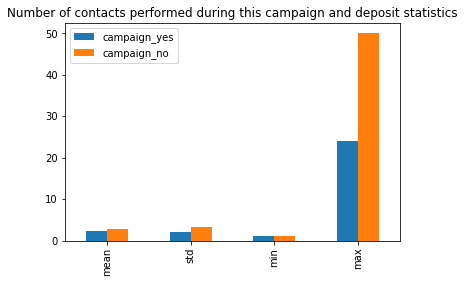

In [24]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [25]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,521.000000,4000.000000
mean,1.090211,0.471250
std,2.055368,1.627371
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,14.000000,25.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

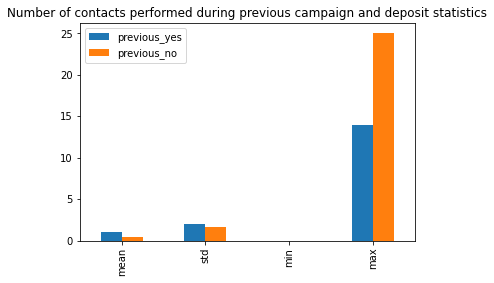

In [26]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

# Data Cleaning

    Normalise numeric features
    Apply ordinal encoding where possible for catetorical data
    Otherise apply one hot encoding

In [27]:
#processing and scaling numerical data columns
scaler = StandardScaler()
num_df = df.select_dtypes(include=np.number)
num_df_arr = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_df_arr, columns=num_df.columns)
num_df

,age,balance,day,duration,campaign,pdays,previous
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413
...,...,...,...,...,...,...,...
4516,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413
4517,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413
4518,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413
4519,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197


In [28]:
# apply ordinal label to ordinal categorical data
cat_df = df.select_dtypes(include='object')

binary_dict = {'yes':1, 'no':0}
calendar_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
                 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
education_dict = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}

cat_df['y'].replace(binary_dict, inplace=True)
cat_df['default'].replace(binary_dict, inplace=True)
cat_df['housing'].replace(binary_dict, inplace=True)
cat_df['loan'].replace(binary_dict, inplace=True)
cat_df['month'].replace(calendar_dict, inplace=True)
cat_df['education'].replace(education_dict, inplace=True)

cat_df

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,1,0,0,0,cellular,10,unknown,0
1,services,married,2,0,1,1,cellular,5,failure,0
2,management,single,3,0,1,0,cellular,4,failure,0
3,management,married,3,0,1,1,unknown,6,unknown,0
4,blue-collar,married,2,0,1,0,unknown,5,unknown,0
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,2,0,1,0,cellular,7,unknown,0
4517,self-employed,married,3,1,1,1,unknown,5,unknown,0
4518,technician,married,2,0,0,0,cellular,8,unknown,0
4519,blue-collar,married,2,0,0,0,cellular,2,other,0


In [29]:
# new dataset with scaled numerical data and ordinal categorical features
df2 = pd.concat([cat_df, num_df], axis=1)
df2

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,unemployed,married,1,0,0,0,cellular,10,unknown,0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413
1,services,married,2,0,1,1,cellular,5,failure,0,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734
2,management,single,3,0,1,0,cellular,4,failure,0,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124
3,management,married,3,0,1,1,unknown,6,unknown,0,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413
4,blue-collar,married,2,0,1,0,unknown,5,unknown,0,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,services,married,2,0,1,0,cellular,7,unknown,0,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413
4517,self-employed,married,3,1,1,1,unknown,5,unknown,0,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413
4518,technician,married,2,0,0,0,cellular,8,unknown,0,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413
4519,blue-collar,married,2,0,0,0,cellular,2,other,0,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197


In [30]:
# apply one hot encoding to the rest of the categorical features
df2 = pd.get_dummies(df2, drop_first=True)
df2

,education,default,housing,loan,month,y,age,balance,day,duration,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,10,0,-1.056270,0.121072,0.374052,-0.711861,...,0,1,0,1,0,0,0,0,0,1
1,2,0,1,1,5,0,-0.772583,1.118644,-0.596026,-0.169194,...,0,0,0,1,0,0,0,0,0,0
2,3,0,1,0,4,0,-0.583458,-0.024144,0.010273,-0.303898,...,0,0,0,0,1,0,0,0,0,0
3,3,0,1,1,6,0,-1.056270,0.017726,-1.566105,-0.250017,...,0,0,0,1,0,0,1,0,0,1
4,2,0,1,0,5,0,1.686036,-0.472753,-1.323585,-0.146102,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2,0,1,0,7,0,-0.772583,-0.583410,1.707910,0.250315,...,0,0,0,1,0,0,0,0,0,1
4517,3,1,1,1,5,0,1.496912,-1.573671,-0.838546,-0.427057,...,0,0,0,1,0,0,1,0,0,1
4518,2,0,0,0,8,0,1.496912,-0.374724,0.374052,-0.434754,...,1,0,0,1,0,0,0,0,0,1
4519,2,0,0,0,2,0,-1.245394,-0.094925,-1.202326,-0.519426,...,0,0,0,1,0,0,0,1,0,0


# Applying Machine learning models without SMOTE

## 1- Models to be applied

     Logistic Regression, Support Vector Machine, Naive Bayes' Classifier, Decision Tree, Random Forest
    
## 2 -Metrics to study 

     Quantitative - Accuracy score, Recall, Precision
    
     Visual - Confusion matrix, ROC curve

## Split Dataset for Training and Testing

In [31]:
X = df2.drop(columns = 'y')
y = df2['y']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## logistic regression

In [34]:
logreg = LogisticRegression().fit(X_train, y_train)
ypred_logreg = logreg.predict(X_test)

## SVM

In [35]:
svc= SVC(probability=True).fit(X_train, y_train)
ypred_svc = svc.predict(X_test)

## naive bayes

In [36]:
gauss = GaussianNB().fit(X_train, y_train)
ypred_gauss = gauss.predict(X_test)

## Decision Tree

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
ypred_dt = dt.predict(X_test)

## Random Forest

In [39]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)

In [40]:
print('Logistic Regression\n', classification_report(y_test, ypred_logreg))
print('Support Vector Machine\n', classification_report(y_test, ypred_svc))
print('Naive Bayes\'s Classifier\n', classification_report(y_test, ypred_gauss))
print('Decision Tree\'s Classifier\n', classification_report(y_test, ypred_dt))
print('Random Forest\'s Classifier\n', classification_report(y_test, ypred_rf))

Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1201
           1       0.58      0.26      0.36       156

    accuracy                           0.89      1357
   macro avg       0.74      0.62      0.65      1357
weighted avg       0.87      0.89      0.87      1357

Support Vector Machine
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1201
           1       0.58      0.04      0.08       156

    accuracy                           0.89      1357
   macro avg       0.74      0.52      0.51      1357
weighted avg       0.85      0.89      0.84      1357

Naive Bayes's Classifier
               precision    recall  f1-score   support

           0       0.92      0.85      0.89      1201
           1       0.28      0.44      0.34       156

    accuracy                           0.81      1357
   macro avg       0.60      0.65      0.61      1357
wei

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Co

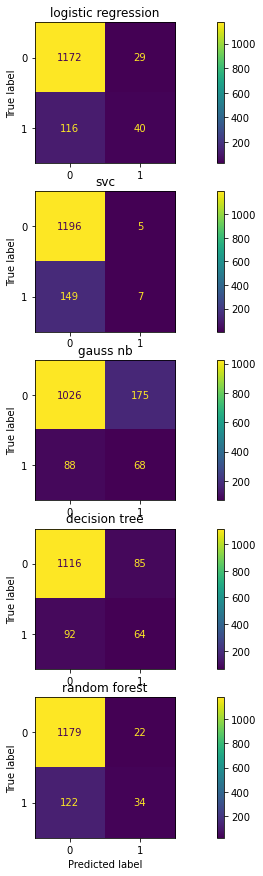

In [43]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax1)
ax1.grid(False)
ax1.set_xlabel("")
ax1.set_title('logistic regression')

plot_confusion_matrix(svc, X_test, y_test, ax=ax2)
ax2.grid(False)
ax2.set_xlabel("")
ax2.set_title('svc')

plot_confusion_matrix(gauss, X_test, y_test, ax=ax3)
ax3.grid(False)
ax3.set_xlabel("")
ax3.set_title('gauss nb')

plot_confusion_matrix(dt, X_test, y_test, ax=ax4)
ax4.grid(False)
ax4.set_xlabel("")
ax4.set_title('decision tree')

plot_confusion_matrix(rf, X_test, y_test, ax=ax5)
ax5.grid(False)
ax5.set_title('random forest')

plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  wa

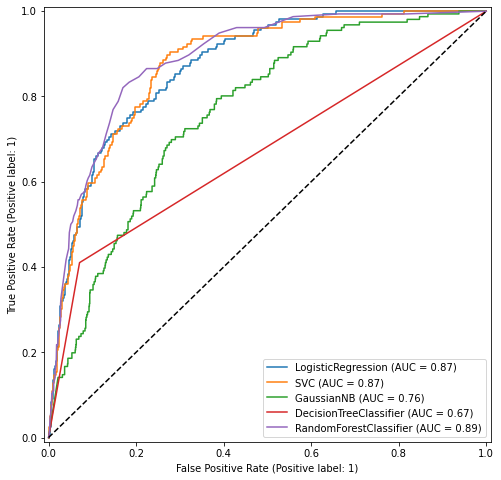

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
plot_roc_curve(logreg, X_test, y_test, ax=ax)
plot_roc_curve(svc, X_test, y_test, ax=ax)
plot_roc_curve(gauss, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)

plt.show()

# Applying Machine learning models with SMOTE

## 1- Models to be applied

     Logistic Regression, Support Vector Machine, Naive Bayes' Classifier, Decision Tree, Random Forest
    
## 2 -Metrics to study 

     Quantitative - Accuracy score, Recall, Precision
    
     Visual - Confusion matrix, ROC curve

In [57]:
X1 = df2.drop(columns = 'y')
y1 = df2['y']

In [58]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=42)

In [59]:
print(sum(y_train1 ==0))

2799


In [60]:
print(sum(y_train1 ==1))

365


In [61]:
sm=SMOTE(random_state=666)

In [62]:
X_train1, y_train1= sm.fit_resample(X_train1, y_train1)

<AxesSubplot:xlabel='y', ylabel='count'>

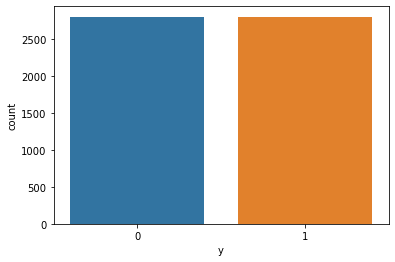

In [63]:
sns.countplot(x=y_train1, data=df2)

## logistic regression

In [67]:
logreg1 = LogisticRegression().fit(X_train1, y_train1)
ypred_logreg1 = logreg1.predict(X_test1)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [68]:
svc1= SVC(probability=True).fit(X_train1, y_train1)
ypred_svc1 = svc1.predict(X_test1)

## naive bayes

In [69]:
gauss1 = GaussianNB().fit(X_train1, y_train1)
ypred_gauss1 = gauss1.predict(X_test1)

## Decision Tree

In [70]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train1, y_train1)
ypred_dt1 = dt1.predict(X_test1)

## Random Forest

In [71]:
rf1 = RandomForestClassifier(random_state=0)
rf1.fit(X_train1, y_train1)
ypred_rf1 = rf1.predict(X_test1)

In [72]:
print('Logistic Regression\n', classification_report(y_test1, ypred_logreg1))
print('Support Vector Machine\n', classification_report(y_test1, ypred_svc1))
print('Naive Bayes\'s Classifier\n', classification_report(y_test1, ypred_gauss1))
print('Decision Tree\'s Classifier\n', classification_report(y_test1, ypred_dt1))
print('Random Forest\'s Classifier\n', classification_report(y_test1, ypred_rf1))

Logistic Regression
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      1201
           1       0.36      0.52      0.43       156

    accuracy                           0.84      1357
   macro avg       0.65      0.70      0.67      1357
weighted avg       0.87      0.84      0.85      1357

Support Vector Machine
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      1201
           1       0.41      0.64      0.50       156

    accuracy                           0.85      1357
   macro avg       0.68      0.76      0.71      1357
weighted avg       0.89      0.85      0.87      1357

Naive Bayes's Classifier
               precision    recall  f1-score   support

           0       0.93      0.61      0.73      1201
           1       0.17      0.63      0.27       156

    accuracy                           0.61      1357
   macro avg       0.55      0.62      0.50      1357
wei

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Co

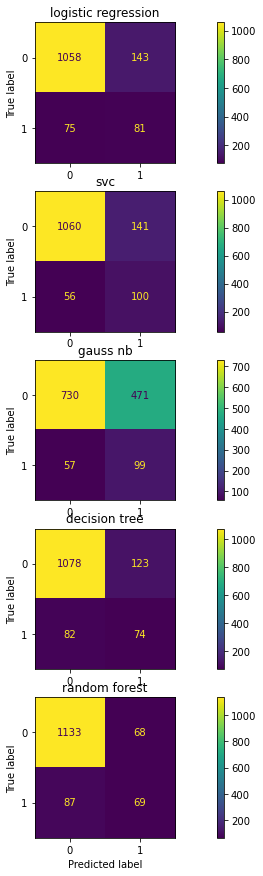

In [73]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))
plot_confusion_matrix(logreg1, X_test1, y_test1, ax=ax1)
ax1.grid(False)
ax1.set_xlabel("")
ax1.set_title('logistic regression')

plot_confusion_matrix(svc1, X_test1, y_test1, ax=ax2)
ax2.grid(False)
ax2.set_xlabel("")
ax2.set_title('svc')

plot_confusion_matrix(gauss1, X_test1, y_test1, ax=ax3)
ax3.grid(False)
ax3.set_xlabel("")
ax3.set_title('gauss nb')

plot_confusion_matrix(dt1, X_test1, y_test1, ax=ax4)
ax4.grid(False)
ax4.set_xlabel("")
ax4.set_title('decision tree')

plot_confusion_matrix(rf1, X_test1, y_test1, ax=ax5)
ax5.grid(False)
ax5.set_title('random forest')

plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  wa

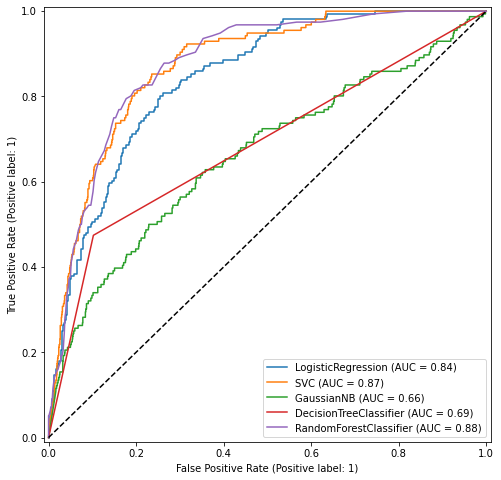

In [74]:
fig, ax = plt.subplots(figsize=(8,8))
plot_roc_curve(logreg1, X_test1, y_test1, ax=ax)
plot_roc_curve(svc1, X_test1, y_test1, ax=ax)
plot_roc_curve(gauss1, X_test1, y_test1, ax=ax)
plot_roc_curve(dt1, X_test1, y_test1, ax=ax)
plot_roc_curve(rf1, X_test1, y_test1, ax=ax)
plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)

plt.show()